In [142]:
###following the ref paper. wrote a python code to study the thermophoresis of a colloid (size = 1.6 um) in liquid crystal 5CB. Parameters are different from paper: gradient T, no thermal diffusion coeff

Thermophoresis of a colloid in LC 5CB

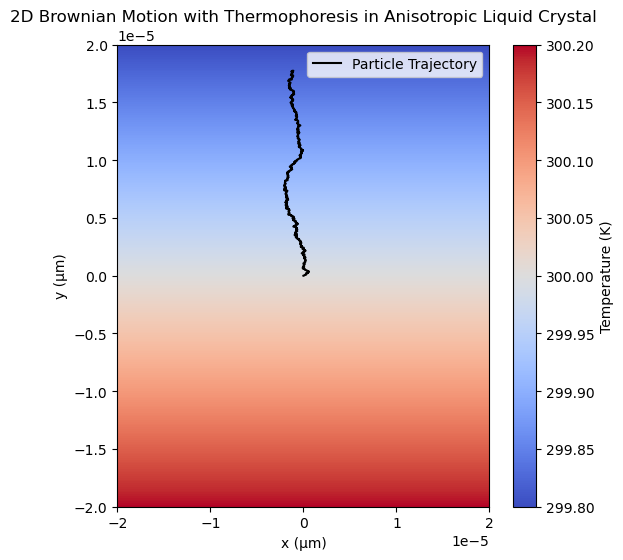

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
viscosity_x = 0.001  # Viscosity in Pa.s along x-axis
viscosity_y = 0.01  # Viscosity in Pa.s along y-axis (different from viscosity along x-axis)
particle_radius = 1.6e-6  # Particle radius in meters
temperature_gradient = 1e-2  # Temperature gradient in K/m along y-axis
initial_temperature = 300  # Initial temperature in K (at y=0)
simulation_steps = 1000  # Number of simulation steps
time_step = 0.01  # Time step for the simulation in seconds

# Stokes-Einstein relation: Calculate diffusion coefficients separately
kb = 1.380649e-23  # Boltzmann constant in J/K
D_x = (kb * initial_temperature) / (6 * np.pi * viscosity_x * particle_radius)  # Diffusion coefficient along x-axis
D_y = (kb * initial_temperature) / (6 * np.pi * viscosity_y * particle_radius)  # Diffusion coefficient along y-axis

# Function to calculate thermophoretic drift
def thermophoretic_drift(particle_position):
    y = particle_position[1]
    # Calculate temperature at the particle's current position
    temperature = initial_temperature + y * temperature_gradient
    # Calculate thermal diffusion coefficient
    thermal_diff_coeff = 54e-12  # m^2 s^-1 K^-1: value from reference paper
    # Calculate elastic diffusion coefficient (based on provided formula)
    T_ni = 308  # Kelvin
    K_o = 1e-11
    alpha = 2
    c_e = 44
    elastic_diff_coeff = (2 * alpha * c_e * K_o * particle_radius / T_ni) * (1 - temperature / T_ni)**(2 * alpha - 1)
    driff_coeff = thermal_diff_coeff - elastic_diff_coeff
    thermophoretic_velocity = (driff_coeff * temperature_gradient) / (6 * np.pi * viscosity_y * particle_radius)
    return np.array([0, thermophoretic_velocity])

# Initialize particle position
particle_position = np.array([0, 0], dtype=float)
trajectory_x = [particle_position[0]]
trajectory_y = [particle_position[1]]

# Run simulation
np.random.seed(0)  # For reproducibility
for _ in range(simulation_steps):
    drift = thermophoretic_drift(particle_position)
    # Generate random displacements for Brownian motion based on diffusion coefficients
    random_displacement_x = np.sqrt(2 * D_x * time_step) * np.random.randn()
    random_displacement_y = np.sqrt(2 * D_y * time_step) * np.random.randn()
    random_displacement = np.array([random_displacement_x, random_displacement_y])
    # Update particle position
    particle_position += drift * time_step + random_displacement
    # Store trajectory
    trajectory_x.append(particle_position[0])
    trajectory_y.append(particle_position[1])

# Create plot
fig, ax = plt.subplots(figsize=(6, 6))

# Plot particle trajectory
ax.plot(trajectory_x, trajectory_y, label='Particle Trajectory', color='black')

# Define y-axis range
y_range = np.linspace(-20, 20, 1000)

# Calculate temperature gradient along y-axis
temperature_values = initial_temperature + y_range * temperature_gradient

# Create a 2D temperature map where temperature varies along y-axis
temperature_map = temperature_values.reshape(-1, 1)  # Convert 1D array to 2D array

# Plot the temperature gradient as a color map along the y-axis
gradient_bar = ax.imshow(temperature_map, cmap='coolwarm', extent=[-2e-5, 2e-5, -2e-5, 2e-5], aspect='auto')

# Add color bar for the temperature gradient
cbar = plt.colorbar(gradient_bar, ax=ax, orientation='vertical')
cbar.set_label('Temperature (K)')

# Set plot limits and aspect ratio
ax.set_xlim(-2e-5, 2e-5)  # Convert from -2e-5 m to -20 um and 2e-5 m to 20 um
ax.set_ylim(-2e-5, 2e-5)  # Convert from -2e-5 m to -20 um and 2e-5 m to 20 um

# Add labels and title
ax.set_xlabel('x (μm)')
ax.set_ylabel('y (μm)')
ax.set_title('2D Brownian Motion with Thermophoresis in Anisotropic Liquid Crystal')

# Add legend
ax.legend()

# Show plot
plt.show()


Report the risk

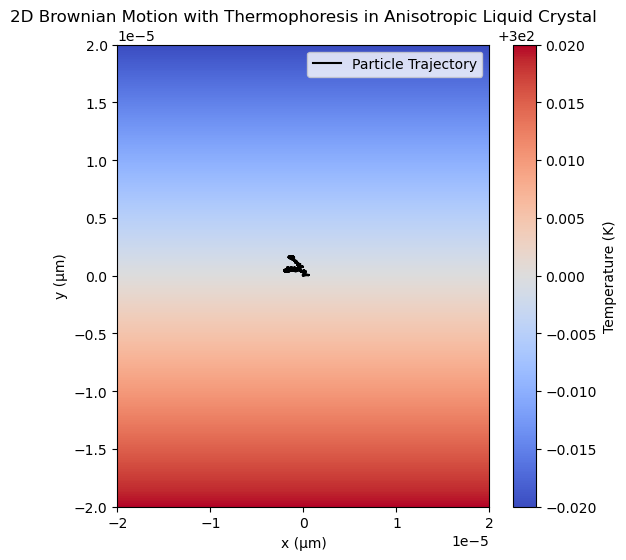

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
viscosity_x = 0.001  # Viscosity in Pa.s along x-axis
viscosity_y = 0.01  # Viscosity in Pa.s along y-axis (different from viscosity along x-axis)
particle_radius = 1.6e-6  # Particle radius in meters
temperature_gradient = 1e-3  # Temperature gradient in K/m along y-axis
initial_temperature = 300  # Initial temperature in K (at y=0)
simulation_steps = 1000  # Number of simulation steps
time_step = 0.01  # Time step for the simulation in seconds

# Stokes-Einstein relation: Calculate diffusion coefficients separately
kb = 1.380649e-23  # Boltzmann constant in J/K
D_x = (kb * initial_temperature) / (6 * np.pi * viscosity_x * particle_radius)  # Diffusion coefficient along x-axis
D_y = (kb * initial_temperature) / (6 * np.pi * viscosity_y * particle_radius)  # Diffusion coefficient along y-axis

# Function to calculate thermophoretic drift
def thermophoretic_drift(particle_position):
    y = particle_position[1]
    # Calculate temperature at the particle's current position
    temperature = initial_temperature + y * temperature_gradient
    # Calculate thermal diffusion coefficient
    thermal_diff_coeff = 54e-12  # m^2 s^-1 K^-1: value from reference paper
    # Calculate elastic diffusion coefficient (based on provided formula)
    T_ni = 308  # Kelvin
    K_o = 1e-11
    alpha = 2
    c_e = 44
    elastic_diff_coeff = (2 * alpha * c_e * K_o * particle_radius / T_ni) * (1 - temperature / T_ni)**(2 * alpha - 1)
    driff_coeff = thermal_diff_coeff - elastic_diff_coeff
    thermophoretic_velocity = (driff_coeff * temperature_gradient) / (6 * np.pi * viscosity_y * particle_radius)
    return np.array([0, thermophoretic_velocity])

# Initialize particle position
particle_position = np.array([0, 0], dtype=float)
trajectory_x = [particle_position[0]]
trajectory_y = [particle_position[1]]

# Run simulation
np.random.seed(0)  # For reproducibility
for _ in range(simulation_steps):
    drift = thermophoretic_drift(particle_position)
    # Generate random displacements for Brownian motion based on diffusion coefficients
    random_displacement_x = np.sqrt(2 * D_x * time_step) * np.random.randn()
    random_displacement_y = np.sqrt(2 * D_y * time_step) * np.random.randn()
    random_displacement = np.array([random_displacement_x, random_displacement_y])
    # Update particle position
    particle_position += drift * time_step + random_displacement
    # Store trajectory
    trajectory_x.append(particle_position[0])
    trajectory_y.append(particle_position[1])

# Create plot
fig, ax = plt.subplots(figsize=(6, 6))

# Plot particle trajectory
ax.plot(trajectory_x, trajectory_y, label='Particle Trajectory', color='black')

# Define y-axis range
y_range = np.linspace(-20, 20, 1000)

# Calculate temperature gradient along y-axis
temperature_values = initial_temperature + y_range * temperature_gradient

# Create a 2D temperature map where temperature varies along y-axis
temperature_map = temperature_values.reshape(-1, 1)  # Convert 1D array to 2D array

# Plot the temperature gradient as a color map along the y-axis
gradient_bar = ax.imshow(temperature_map, cmap='coolwarm', extent=[-2e-5, 2e-5, -2e-5, 2e-5], aspect='auto')

# Add color bar for the temperature gradient
cbar = plt.colorbar(gradient_bar, ax=ax, orientation='vertical')
cbar.set_label('Temperature (K)')

# Set plot limits and aspect ratio
ax.set_xlim(-2e-5, 2e-5)  # Convert from -2e-5 m to -20 um and 2e-5 m to 20 um
ax.set_ylim(-2e-5, 2e-5)  # Convert from -2e-5 m to -20 um and 2e-5 m to 20 um

# Add labels and title
ax.set_xlabel('x (μm)')
ax.set_ylabel('y (μm)')
ax.set_title('2D Brownian Motion with Thermophoresis in Anisotropic Liquid Crystal')

# Add legend
ax.legend()

# Show plot
plt.show()


In [52]:
import numpy as np
from scipy.stats import norm

# Number of simulations
num_simulations = 10000

# Simulation parameters
time_period = 1.0  # Time period in seconds
confidence_level = 0.95  # Confidence level

# Define a function to simulate the particle's motion
def simulate_particle_motion(num_simulations, time_period):
    drift_velocity = thermophoretic_drift([0, 0])[1]  # Thermophoretic drift velocity in the y-direction
    displacements = []

    # Run the simulation
    for _ in range(num_simulations):
        # Simulate the particle's motion for the given time period
        random_displacement = np.sqrt(2 * D_y * time_period) * np.random.randn()
        net_displacement_y = drift_velocity * time_period + random_displacement
        displacements.append(net_displacement_y)

    return np.array(displacements)

# Simulate the particle's motion
displacements_y = simulate_particle_motion(num_simulations, time_period)

# Calculate the mean and standard deviation of the displacements in the y-direction
mean_y = np.mean(displacements_y)
std_dev_y = np.std(displacements_y)

# Calculate the risk (probability that the net displacement is less than 0)
risk = norm.cdf(0, mean_y, std_dev_y)

# Report the risk
print(f"The risk that the particle's motion is opposite to the thermophoretic force direction is {risk * 100:.2f}%")

# Print the confidence level
print(f"Confidence level: {confidence_level * 100:.2f}%")


The risk that the particle's motion is opposite to the thermophoretic force direction is 14.18%
Confidence level: 95.00%


In the context of the analogy to financial markets, where Value at Risk (VaR) measures potential financial loss at a certain confidence level, we want to estimate the risk of a particle undergoing motion opposite to the thermophoretic force direction.

To calculate this risk, we need to understand the underlying distribution of the particle's motion and then estimate the probability that the particle's net displacement in a given time period is opposite to the thermophoretic force direction.

Here’s how you might approach this problem:

Determine the net displacement: In your simulation, each time step results in a net displacement of the particle. This net displacement includes both the drift due to thermophoretic force and the random Brownian motion.
Analyze the distribution of displacements: The displacement at each step will depend on the thermophoretic drift and the Brownian motion (random displacement). Brownian motion can be modeled as a normal distribution (Gaussian distribution) due to the central limit theorem. The drift term will influence the mean of this distribution, so you should analyze the distribution of net displacements.
Calculate the probability of motion opposite to the thermophoretic force direction: Given the net displacement distribution, you want to calculate the probability that the net displacement over a specific time period is in the opposite direction to the thermophoretic force.
Estimate the risk: You can use the estimated probability as a measure of the risk that the particle's motion is opposite to the thermophoretic force direction.
Adjust the time period and confidence level: The risk measure should account for the time period over which you want to estimate the risk and the desired confidence level (e.g., 95% confidence level).
Let's go through an example of how you might calculate this risk:

Implementation:
To calculate the risk of a particle undergoing motion opposite to the thermophoretic force direction, follow these steps:

Simulate the particle's motion: Use the existing code to simulate the particle's motion for the desired time period. Record the net displacement of the particle in the y-direction (aligned with the thermophoretic force).
Analyze the distribution of displacements: Calculate the mean and standard deviation of the particle's displacement in the y-direction over the specified time period. This distribution is expected to be roughly Gaussian.
Calculate the probability: Calculate the probability that the net displacement in the y-direction is less than zero (opposite to the thermophoretic force direction). This probability can be calculated using the cumulative distribution function (CDF) of the normal distribution.
Report the risk: The calculated probability represents the risk that the particle undergoes motion opposite to the thermophoretic force direction.
Example Code:
Here's an example code snippet that demonstrates how to estimate the risk:


To calculate the risk at different values of the temperature gradient and plot the temperature gradient against risk, you need to perform the following steps:

Create a range of temperature gradients: Define a range of temperature gradient values that you want to test.
Calculate the risk for each temperature gradient: For each value in the range of temperature gradients, simulate the particle's motion, calculate the risk (probability of motion opposite to the thermophoretic force direction), and store the result.
Plot the results: Plot the temperature gradient values on the x-axis and the calculated risk values on the y-axis.

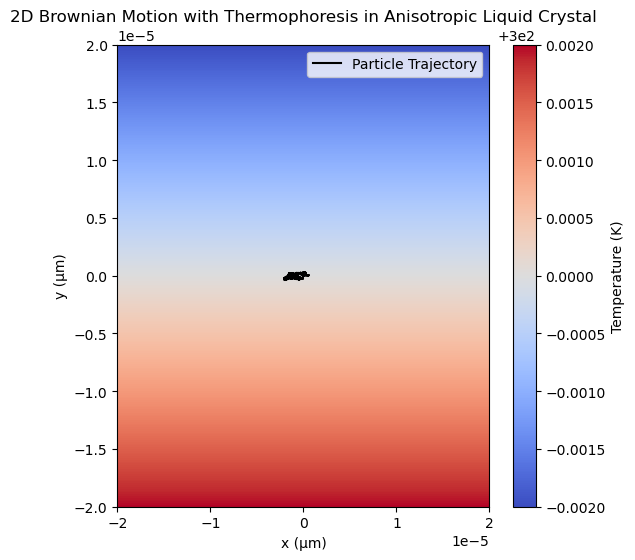

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
viscosity_x = 0.001  # Viscosity in Pa.s along x-axis
viscosity_y = 0.01  # Viscosity in Pa.s along y-axis (different from viscosity along x-axis)
particle_radius = 1.6e-6  # Particle radius in meters
temperature_gradient = 1e-4  # Temperature gradient in K/m along y-axis
initial_temperature = 300  # Initial temperature in K (at y=0)
simulation_steps = 1000  # Number of simulation steps
time_step = 0.01  # Time step for the simulation in seconds

# Stokes-Einstein relation: Calculate diffusion coefficients separately
kb = 1.380649e-23  # Boltzmann constant in J/K
D_x = (kb * initial_temperature) / (6 * np.pi * viscosity_x * particle_radius)  # Diffusion coefficient along x-axis
D_y = (kb * initial_temperature) / (6 * np.pi * viscosity_y * particle_radius)  # Diffusion coefficient along y-axis

# Function to calculate thermophoretic drift
def thermophoretic_drift(particle_position, temperature_gradient):
    y = particle_position[1]
    # Calculate temperature at the particle's current position
    temperature = initial_temperature + y * temperature_gradient
    # Calculate thermal diffusion coefficient
    thermal_diff_coeff = 54e-12  # m^2 s^-1 K^-1: value from reference paper
    # Calculate elastic diffusion coefficient (based on provided formula)
    T_ni = 308  # Kelvin
    K_o = 1e-11
    alpha = 2
    c_e = 44
    elastic_diff_coeff = (2 * alpha * c_e * K_o * particle_radius / T_ni) * (1 - temperature / T_ni)**(2 * alpha - 1)
    driff_coeff = thermal_diff_coeff - elastic_diff_coeff
    thermophoretic_velocity = (driff_coeff * temperature_gradient) / (6 * np.pi * viscosity_y * particle_radius)
    return np.array([0, thermophoretic_velocity])

# Initialize particle position
particle_position = np.array([0, 0], dtype=float)
trajectory_x = [particle_position[0]]
trajectory_y = [particle_position[1]]

# Run simulation
np.random.seed(0)  # For reproducibility
for _ in range(simulation_steps):
    drift = thermophoretic_drift(particle_position, temperature_gradient)
    # Generate random displacements for Brownian motion based on diffusion coefficients
    random_displacement_x = np.sqrt(2 * D_x * time_step) * np.random.randn()
    random_displacement_y = np.sqrt(2 * D_y * time_step) * np.random.randn()
    random_displacement = np.array([random_displacement_x, random_displacement_y])
    # Update particle position
    particle_position += drift * time_step + random_displacement
    # Store trajectory
    trajectory_x.append(particle_position[0])
    trajectory_y.append(particle_position[1])

# Create plot
fig, ax = plt.subplots(figsize=(6, 6))

# Plot particle trajectory
ax.plot(trajectory_x, trajectory_y, label='Particle Trajectory', color='black')

# Define y-axis range
y_range = np.linspace(-20, 20, 1000)

# Calculate temperature gradient along y-axis
temperature_values = initial_temperature + y_range * temperature_gradient

# Create a 2D temperature map where temperature varies along y-axis
temperature_map = temperature_values.reshape(-1, 1)  # Convert 1D array to 2D array

# Plot the temperature gradient as a color map along the y-axis
gradient_bar = ax.imshow(temperature_map, cmap='coolwarm', extent=[-2e-5, 2e-5, -2e-5, 2e-5], aspect='auto')

# Add color bar for the temperature gradient
cbar = plt.colorbar(gradient_bar, ax=ax, orientation='vertical')
cbar.set_label('Temperature (K)')

# Set plot limits and aspect ratio
ax.set_xlim(-2e-5, 2e-5)  # Convert from -2e-5 m to -20 um and 2e-5 m to 20 um
ax.set_ylim(-2e-5, 2e-5)  # Convert from -2e-5 m to -20 um and 2e-5 m to 20 um

# Add labels and title
ax.set_xlabel('x (μm)')
ax.set_ylabel('y (μm)')
ax.set_title('2D Brownian Motion with Thermophoresis in Anisotropic Liquid Crystal')

# Add legend
ax.legend()

# Show plot
plt.show()


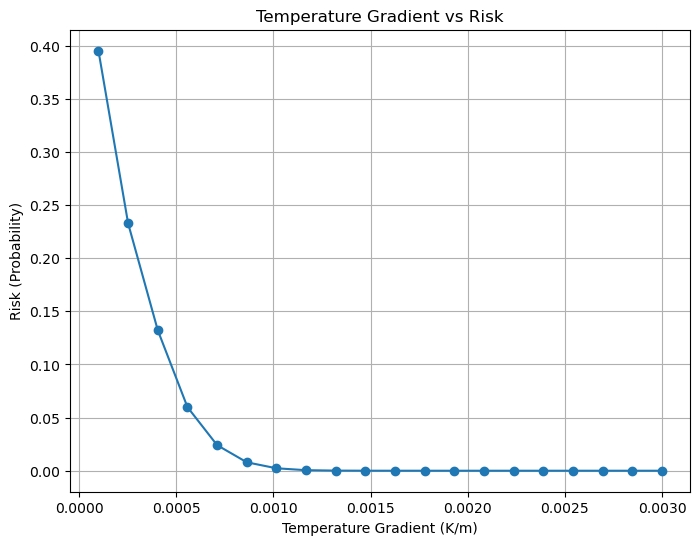

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
viscosity_x = 0.001  # Viscosity in Pa.s along x-axis
viscosity_y = 0.0015  # Viscosity in Pa.s along y-axis (different from viscosity along x-axis)
particle_radius = 1.6e-6  # Particle radius in meters
initial_temperature = 300  # Initial temperature in K (at y=0)
simulation_steps = 1000  # Number of simulation steps
time_step = 0.01  # Time step for the simulation in seconds

# Define a function to simulate the particle's motion and calculate the risk
def calculate_risk(temperature_gradient, num_simulations=10000, time_period=1.0):
    # Calculate the thermophoretic drift velocity in the y-direction
    drift_velocity = thermophoretic_drift([0, 0], temperature_gradient)[1]  # Drift in y-direction
    
    # Calculate diffusion coefficients along x and y directions
    D_x = (1.380649e-23 * initial_temperature) / (6 * np.pi * viscosity_x * particle_radius)  # Diffusion along x
    D_y = (1.380649e-23 * initial_temperature) / (6 * np.pi * viscosity_y * particle_radius)  # Diffusion along y
    
    displacements_y = []
    
    # Simulate the particle's motion
    for _ in range(num_simulations):
        # Simulate the random displacement due to Brownian motion in the y-direction
        random_displacement_y = np.sqrt(2 * D_y * time_period) * np.random.randn()
        # Calculate net displacement in the y-direction
        net_displacement_y = drift_velocity * time_period + random_displacement_y
        displacements_y.append(net_displacement_y)
        
    # Convert the list to a numpy array
    displacements_y = np.array(displacements_y)
    
    # Calculate the mean and standard deviation of the net displacements in the y-direction
    mean_y = np.mean(displacements_y)
    std_dev_y = np.std(displacements_y)
    
    # Calculate the risk (probability that the net displacement is less than 0)
    risk = norm.cdf(0, mean_y, std_dev_y)
    
    return risk

# Define a range of temperature gradients to test
temperature_gradients = np.linspace(0.1e-3, 3e-3, 20)  # From 0.1e-3 K/m to 3e-3 K/m

# List to store calculated risks
risks = []

# Calculate risk for each temperature gradient
for temperature_gradient in temperature_gradients:
    risk = calculate_risk(temperature_gradient)
    risks.append(risk)

# Plot the temperature gradient vs risk
plt.figure(figsize=(8, 6))
plt.plot(temperature_gradients, risks, marker='o')
plt.xlabel('Temperature Gradient (K/m)')
plt.ylabel('Risk (Probability)')
plt.title('Temperature Gradient vs Risk')
plt.grid(True)
plt.show()


o calculate the standard deviation of the particle motion at different temperature gradients, follow these steps:

Create a range of temperature gradients: Define a range of temperature gradient values that you want to test.
Simulate the particle's motion: For each temperature gradient, simulate the particle's motion over a specified time period.
Calculate the standard deviation: Calculate the standard deviation of the net displacements (or returns) of the particle in the y-direction.
Plot the results: Plot the temperature gradient values on the x-axis and the calculated standard deviation values on the y-axis.

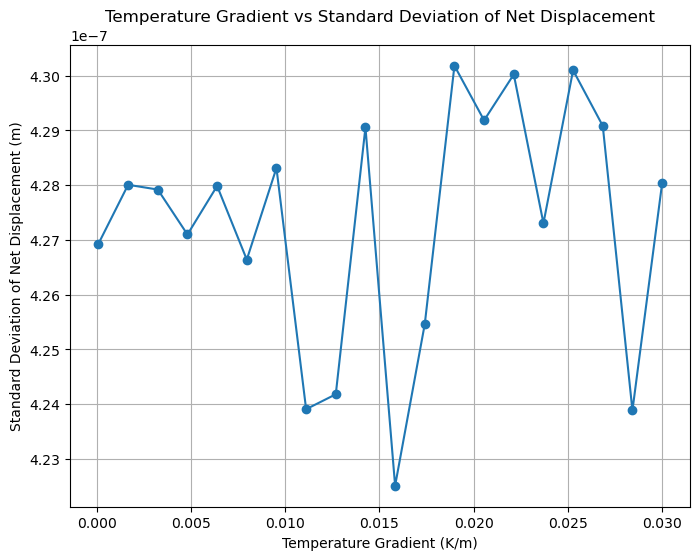

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
viscosity_x = 0.001  # Viscosity in Pa.s along x-axis
viscosity_y = 0.0015  # Viscosity in Pa.s along y-axis (different from viscosity along x-axis)
particle_radius = 1.6e-6  # Particle radius in meters
initial_temperature = 300  # Initial temperature in K (at y=0)
simulation_steps = 1000  # Number of simulation steps
time_step = 0.01  # Time step for the simulation in seconds

# Define a function to simulate the particle's motion and calculate the standard deviation
def calculate_std_dev(temperature_gradient, num_simulations=10000, time_period=1.0):
    # Calculate the thermophoretic drift velocity in the y-direction
    drift_velocity = thermophoretic_drift([0, 0], temperature_gradient)[1]  # Drift in y-direction
    
    # Calculate diffusion coefficients along x and y directions
    D_x = (1.380649e-23 * initial_temperature) / (6 * np.pi * viscosity_x * particle_radius)  # Diffusion along x
    D_y = (1.380649e-23 * initial_temperature) / (6 * np.pi * viscosity_y * particle_radius)  # Diffusion along y
    
    displacements_y = []
    
    # Simulate the particle's motion
    for _ in range(num_simulations):
        # Simulate the random displacement due to Brownian motion in the y-direction
        random_displacement_y = np.sqrt(2 * D_y * time_period) * np.random.randn()
        # Calculate net displacement in the y-direction
        net_displacement_y = drift_velocity * time_period + random_displacement_y
        displacements_y.append(net_displacement_y)
        
    # Convert the list to a numpy array
    displacements_y = np.array(displacements_y)
    
    # Calculate the standard deviation of the net displacements in the y-direction
    std_dev_y = np.std(displacements_y)
    
    return std_dev_y

# Define a range of temperature gradients to test
temperature_gradients = np.linspace(0.1e-3, 3e-2, 20)  # From 0.1e-3 K/m to 3e-3 K/m

# List to store calculated standard deviations
std_devs = []

# Calculate standard deviation for each temperature gradient
for temperature_gradient in temperature_gradients:
    std_dev = calculate_std_dev(temperature_gradient)
    std_devs.append(std_dev)

# Plot the temperature gradient vs standard deviation
plt.figure(figsize=(8, 6))
plt.plot(temperature_gradients, std_devs, marker='o')
plt.xlabel('Temperature Gradient (K/m)')
plt.ylabel('Standard Deviation of Net Displacement (m)')
plt.title('Temperature Gradient vs Standard Deviation of Net Displacement')
plt.grid(True)
plt.show()


In financial markets, the beta of an asset is a measure of its volatility relative to a market index, such as the S&P 500. It quantifies the sensitivity of the asset's returns to changes in the returns of the market index. A beta value of 1 indicates that the asset's returns are perfectly correlated with the market index, while a beta value greater than 1 suggests that the asset is more volatile than the market index, and a beta value less than 1 indicates that the asset is less volatile.

In the context of particle motion, you can calculate a similar measure of beta to determine the particle's relative volatility compared to a "benchmark" or reference particle motion. Here, the benchmark can be the particle motion without any thermophoretic drift (i.e., purely Brownian motion), while the asset in question is the particle motion with thermophoretic drift.

To calculate the beta value for particle motion:

Simulate the reference particle motion: Simulate the motion of a particle without any thermophoretic drift (i.e., purely Brownian motion).
Simulate the asset particle motion: Simulate the motion of a particle with thermophoretic drift.
Calculate the returns: Calculate the net displacements of each particle over a certain time period, then compute the returns (percentage changes) based on these displacements.
Calculate the covariance and variance: Calculate the covariance between the returns of the asset particle and the reference particle. Calculate the variance of the reference particle's returns.
Calculate the beta: Beta is calculated as the covariance of the asset's returns with the reference's returns divided by the variance of the reference's returns.

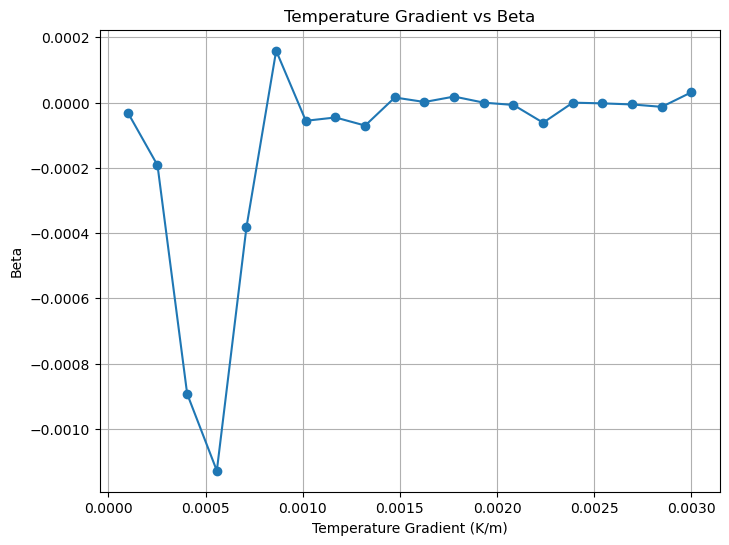

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
viscosity_x = 0.001  # Viscosity in Pa.s along x-axis
viscosity_y = 0.0015  # Viscosity in Pa.s along y-axis
particle_radius = 1.6e-6  # Particle radius in meters
initial_temperature = 300  # Initial temperature in K (at y=0)
time_step = 0.01  # Time step for the simulation in seconds
num_simulations = 10000  # Number of simulations
time_period = 1.0  # Time period in seconds

# Define the thermophoretic drift function
def thermophoretic_drift(particle_position, temperature_gradient):
    y = particle_position[1]
    # Calculate temperature at the particle's current position
    temperature = initial_temperature + y * temperature_gradient
    # Calculate thermal diffusion coefficient
    thermal_diff_coeff = 54e-12  # m^2 s^-1 K^-1: value from reference paper
    # Calculate elastic diffusion coefficient (based on provided formula)
    T_ni = 308  # Kelvin
    K_o = 1e-11
    alpha = 2
    c_e = 44
    elastic_diff_coeff = (2 * alpha * c_e * K_o * particle_radius / T_ni) * (1 - temperature / T_ni)**(2 * alpha - 1)
    driff_coeff = thermal_diff_coeff - elastic_diff_coeff
    thermophoretic_velocity = (driff_coeff * temperature_gradient) / (6 * np.pi * viscosity_y * particle_radius)
    return np.array([0, thermophoretic_velocity])

# Function to simulate particle motion
def simulate_particle_motion(temperature_gradient, with_thermophoretic_drift):
    # Calculate diffusion coefficients along x and y directions
    D_x = (1.380649e-23 * initial_temperature) / (6 * np.pi * viscosity_x * particle_radius)  # Diffusion along x
    D_y = (1.380649e-23 * initial_temperature) / (6 * np.pi * viscosity_y * particle_radius)  # Diffusion along y
    
    # Simulate the particle's motion
    displacements_y = []
    for _ in range(num_simulations):
        # Generate random displacement for Brownian motion in the y-direction
        random_displacement_y = np.sqrt(2 * D_y * time_period) * np.random.randn()
        
        # If thermophoretic drift is considered, add it to the displacement
        if with_thermophoretic_drift:
            drift_velocity = thermophoretic_drift([0, 0], temperature_gradient)[1]  # Drift in y-direction
            net_displacement_y = drift_velocity * time_period + random_displacement_y
        else:
            net_displacement_y = random_displacement_y
        
        displacements_y.append(net_displacement_y)
    
    return np.array(displacements_y)

# Function to calculate beta
def calculate_beta(temperature_gradient):
    # Simulate the reference particle motion (purely Brownian motion)
    reference_displacements = simulate_particle_motion(temperature_gradient, with_thermophoretic_drift=False)
    
    # Simulate the asset particle motion (with thermophoretic drift)
    asset_displacements = simulate_particle_motion(temperature_gradient, with_thermophoretic_drift=True)
    
    # Calculate returns (percentage change in displacements)
    reference_returns = np.diff(reference_displacements) / reference_displacements[:-1]
    asset_returns = np.diff(asset_displacements) / asset_displacements[:-1]
    
    # Calculate covariance between asset and reference returns
    covariance = np.cov(asset_returns, reference_returns)[0, 1]
    
    # Calculate variance of reference returns
    variance = np.var(reference_returns)
    
    # Calculate beta
    beta = covariance / variance
    
    return beta

# Define a range of temperature gradients to test
temperature_gradients = np.linspace(0.1e-3, 3e-3, 20)  # From 0.1e-3 K/m to 3e-3 K/m

# List to store calculated beta values
betas = []

# Calculate beta for each temperature gradient
for temperature_gradient in temperature_gradients:
    beta = calculate_beta(temperature_gradient)
    betas.append(beta)

# Plot the temperature gradient vs beta
plt.figure(figsize=(8, 6))
plt.plot(temperature_gradients, betas, marker='o')
plt.xlabel('Temperature Gradient (K/m)')
plt.ylabel('Beta')
plt.title('Temperature Gradient vs Beta')
plt.grid(True)
plt.show()


In financial markets, stress testing involves simulating extreme market conditions to assess how assets or portfolios might perform under adverse scenarios. This process helps in understanding the potential impact of severe events on the financial position and risk profile of assets or portfolios.

In the context of particle motion, stress testing can involve simulating extreme temperature gradients to assess how the particle's motion might change under these conditions. This can give insights into how the particle behaves when exposed to severe changes in the temperature gradient, which might not be typical in normal circumstances.

Here's how you can perform stress testing in your particle motion simulation:

Define extreme temperature gradients: Choose a range of extreme temperature gradients that represent adverse conditions, such as gradients significantly higher or lower than typical values.
Simulate particle motion: For each extreme temperature gradient, simulate the particle's motion over a specified time period.
Analyze the results: Observe how the particle's motion changes under extreme conditions, and analyze the net displacements, velocities, and other relevant metrics.
Visualize and interpret the results: Visualize the particle's motion under each extreme condition to understand how the particle's trajectory and behavior change.

Temperature Gradient: 0.005 K/m
Mean Net Displacement in y-direction: 0.0000060 m
Standard Deviation of Net Displacement in y-direction: 0.0000004514 m

Temperature Gradient: 0.01 K/m
Mean Net Displacement in y-direction: 0.0000119 m
Standard Deviation of Net Displacement in y-direction: 0.0000004381 m

Temperature Gradient: 0.02 K/m
Mean Net Displacement in y-direction: 0.0000239 m
Standard Deviation of Net Displacement in y-direction: 0.0000004308 m



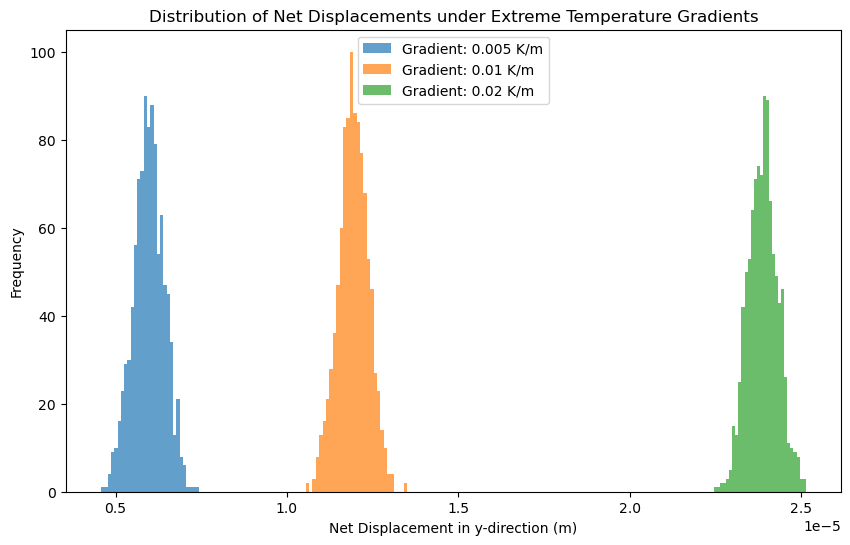

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
viscosity_x = 0.001  # Viscosity in Pa.s along x-axis
viscosity_y = 0.0015  # Viscosity in Pa.s along y-axis
particle_radius = 1.6e-6  # Particle radius in meters
initial_temperature = 300  # Initial temperature in K (at y=0)
time_step = 0.01  # Time step for the simulation in seconds
num_simulations = 1000  # Number of simulations
time_period = 1.0  # Time period in seconds

# Define the thermophoretic drift function
def thermophoretic_drift(particle_position, temperature_gradient):
    y = particle_position[1]
    # Calculate temperature at the particle's current position
    temperature = initial_temperature + y * temperature_gradient
    # Calculate thermal diffusion coefficient
    thermal_diff_coeff = 54e-12  # m^2 s^-1 K^-1: value from reference paper
    # Calculate elastic diffusion coefficient (based on provided formula)
    T_ni = 308  # Kelvin
    K_o = 1e-11
    alpha = 2
    c_e = 44
    elastic_diff_coeff = (2 * alpha * c_e * K_o * particle_radius / T_ni) * (1 - temperature / T_ni)**(2 * alpha - 1)
    driff_coeff = thermal_diff_coeff - elastic_diff_coeff
    thermophoretic_velocity = (driff_coeff * temperature_gradient) / (6 * np.pi * viscosity_y * particle_radius)
    return np.array([0, thermophoretic_velocity])

# Function to simulate particle motion
def simulate_particle_motion(temperature_gradient):
    # Calculate diffusion coefficients along x and y directions
    D_x = (1.380649e-23 * initial_temperature) / (6 * np.pi * viscosity_x * particle_radius)  # Diffusion along x
    D_y = (1.380649e-23 * initial_temperature) / (6 * np.pi * viscosity_y * particle_radius)  # Diffusion along y
    
    # Simulate the particle's motion
    displacements_y = []
    for _ in range(num_simulations):
        # Generate random displacement for Brownian motion in the y-direction
        random_displacement_y = np.sqrt(2 * D_y * time_period) * np.random.randn()
        
        # Add thermophoretic drift to the displacement
        drift_velocity = thermophoretic_drift([0, 0], temperature_gradient)[1]
        net_displacement_y = drift_velocity * time_period + random_displacement_y
        
        displacements_y.append(net_displacement_y)
    
    return np.array(displacements_y)

# Define a range of extreme temperature gradients to test
extreme_temperature_gradients = [5e-3, 10e-3, 20e-3]  # Extreme gradients in K/m

# Plotting particle motion under extreme conditions
plt.figure(figsize=(10, 6))

# Iterate through each extreme temperature gradient and simulate particle motion
for temperature_gradient in extreme_temperature_gradients:
    # Simulate particle motion under the current extreme temperature gradient
    displacements_y = simulate_particle_motion(temperature_gradient)
    
    # Calculate the mean and standard deviation of the net displacements in the y-direction
    mean_y = np.mean(displacements_y)
    std_dev_y = np.std(displacements_y)
    
    # Plot the distribution of net displacements for the current temperature gradient
    plt.hist(displacements_y, bins=30, alpha=0.7, label=f'Gradient: {temperature_gradient} K/m')
    
    # Print the mean and standard deviation for each extreme temperature gradient
    print(f'Temperature Gradient: {temperature_gradient} K/m')
    print(f'Mean Net Displacement in y-direction: {mean_y:.7f} m')
    print(f'Standard Deviation of Net Displacement in y-direction: {std_dev_y:.10f} m')
    print()

# Add labels and legend
plt.xlabel('Net Displacement in y-direction (m)')
plt.ylabel('Frequency')
plt.title('Distribution of Net Displacements under Extreme Temperature Gradients')
plt.legend()

# Show the plot
plt.show()


In financial markets, diversification is a risk management strategy that involves holding a mix of different assets in a portfolio to reduce risk. By spreading investments across different assets, sectors, or geographic regions, the overall risk of the portfolio can be minimized because the performance of one asset can offset the poor performance of another.

In the context of particle motion in a fluid with a temperature gradient, the concept of diversification can be applied to minimize the risk of unpredictable motion or extreme displacements. Here are some ways you might apply diversification:

Different Particle Types: Use different types of particles with varying properties (such as size, material, and density) in the same fluid to distribute the risk of extreme motion across the particles.
Different Temperature Gradients: Simulate the motion of particles in different regions of the fluid with varying temperature gradients. This can reduce the risk associated with any one particular gradient.
Multiple Directions: Consider particle motion in multiple directions (not just the y-axis). This can spread the risk across different axes and provide a more comprehensive view of the system.
Different Fluid Viscosities: Use fluids with varying viscosities to simulate different conditions. This can help understand how the particle motion might change in different fluid environments.
Combining Particle Trajectories: Simulate multiple particle trajectories in the fluid and combine them to understand how the overall system behaves. This can give insights into potential offsets in particle behavior that may lead to a reduction in overall risk.
To illustrate how you might implement diversification in a particle motion simulation, let's focus on using different particle types with varying radii and how they affect particle motion:

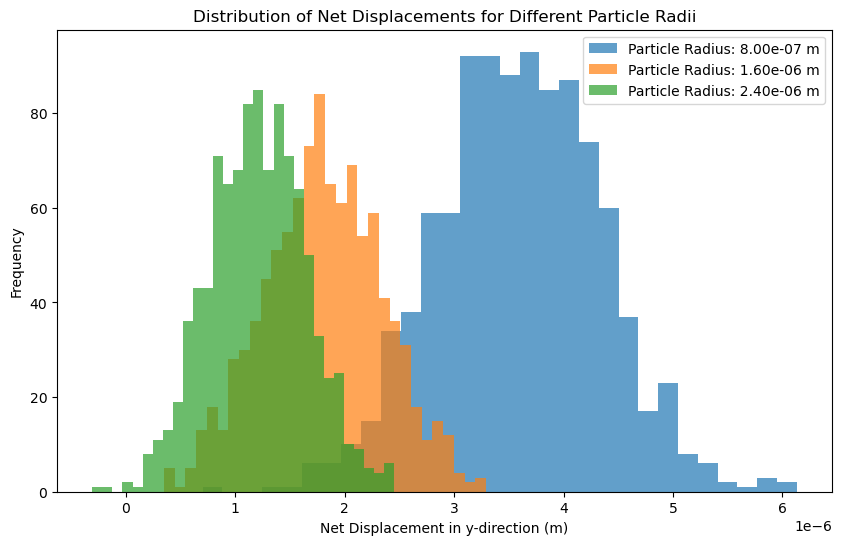

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
viscosity = 0.001  # Viscosity in Pa.s (e.g. water at room temperature)
initial_temperature = 300  # Initial temperature in K (at y=0)
time_step = 0.01  # Time step for the simulation in seconds
num_simulations = 1000  # Number of simulations
time_period = 1.0  # Time period in seconds

# Define the thermophoretic drift function
def thermophoretic_drift(particle_position, temperature_gradient, particle_radius):
    y = particle_position[1]
    # Calculate temperature at the particle's current position
    temperature = initial_temperature + y * temperature_gradient
    # Calculate thermal diffusion coefficient
    thermal_diff_coeff = 54e-12  # m^2 s^-1 K^-1: value from reference paper
    # Calculate elastic diffusion coefficient (based on provided formula)
    T_ni = 308  # Kelvin
    K_o = 1e-11
    alpha = 2
    c_e = 44
    elastic_diff_coeff = (2 * alpha * c_e * K_o * particle_radius / T_ni) * (1 - temperature / T_ni)**(2 * alpha - 1)
    driff_coeff = thermal_diff_coeff - elastic_diff_coeff
    thermophoretic_velocity = (driff_coeff * temperature_gradient) / (6 * np.pi * viscosity * particle_radius)
    return np.array([0, thermophoretic_velocity])

# Function to simulate particle motion
def simulate_particle_motion(temperature_gradient, particle_radius):
    # Calculate diffusion coefficient based on particle radius
    D = (1.380649e-23 * initial_temperature) / (6 * np.pi * viscosity * particle_radius)
    
    # Simulate the particle's motion
    displacements_y = []
    for _ in range(num_simulations):
        # Generate random displacement for Brownian motion in the y-direction
        random_displacement_y = np.sqrt(2 * D * time_period) * np.random.randn()
        
        # Add thermophoretic drift to the displacement
        drift_velocity = thermophoretic_drift([0, 0], temperature_gradient, particle_radius)[1]
        net_displacement_y = drift_velocity * time_period + random_displacement_y
        
        displacements_y.append(net_displacement_y)
    
    return np.array(displacements_y)

# Define a range of particle radii for diversification
particle_radii = [0.8e-6, 1.6e-6, 2.4e-6]  # Radii in meters

# Define the temperature gradient for the simulation
temperature_gradient = 1e-3  # Temperature gradient in K/m

# Initialize lists to store results
all_displacements = []

# Simulate particle motion for different particle radii
for particle_radius in particle_radii:
    displacements_y = simulate_particle_motion(temperature_gradient, particle_radius)
    all_displacements.append(displacements_y)

# Plot the distribution of net displacements for different particle radii
plt.figure(figsize=(10, 6))
for idx, displacements_y in enumerate(all_displacements):
    plt.hist(displacements_y, bins=30, alpha=0.7, label=f'Particle Radius: {particle_radii[idx]:.2e} m')
    
# Add labels and legend
plt.xlabel('Net Displacement in y-direction (m)')
plt.ylabel('Frequency')
plt.title('Distribution of Net Displacements for Different Particle Radii')
plt.legend()

# Show the plot
plt.show()


In the context of particle motion in a fluid with a temperature gradient, using different fluid viscosities can help minimize the risk of unpredictable motion or extreme displacements. By simulating the particle motion in fluids with varying viscosities, you can gain insights into how the behavior of the particle changes under different conditions. This is similar to diversifying investments across different asset types in financial markets to reduce risk.

Here's how you might implement different fluid viscosities in your particle motion simulation:

Define a range of fluid viscosities: Choose a range of fluid viscosities to test, representing different types of fluids or varying conditions.
Simulate particle motion: For each fluid viscosity, simulate the particle's motion over a specified time period.
Analyze the results: Observe how the particle's motion changes under different viscosities, and analyze the net displacements, velocities, and other relevant metrics.
Visualize and interpret the results: Visualize the particle's motion under each fluid viscosity to understand how the particle's trajectory and behavior change.

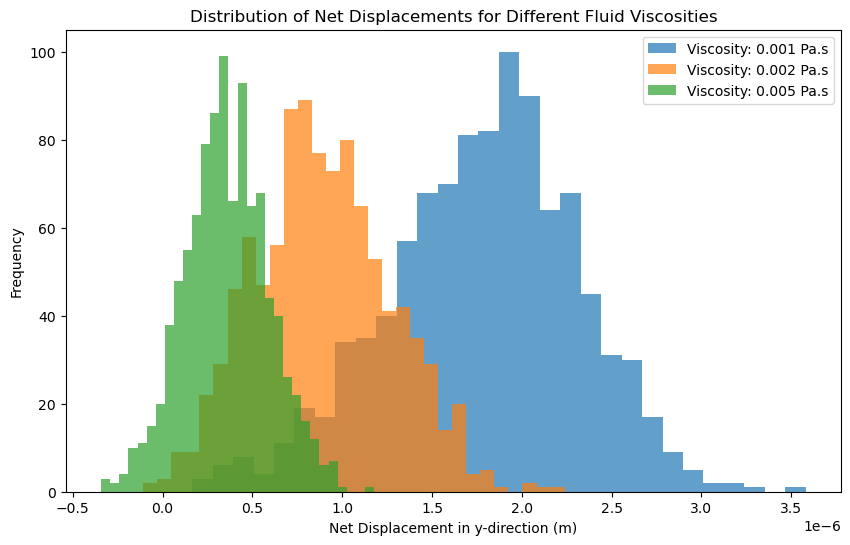

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
initial_temperature = 300  # Initial temperature in K (at y=0)
time_step = 0.01  # Time step for the simulation in seconds
num_simulations = 1000  # Number of simulations
time_period = 1.0  # Time period in seconds
particle_radius = 1.6e-6  # Particle radius in meters

# Define the thermophoretic drift function
def thermophoretic_drift(particle_position, temperature_gradient, viscosity):
    y = particle_position[1]
    # Calculate temperature at the particle's current position
    temperature = initial_temperature + y * temperature_gradient
    # Calculate thermal diffusion coefficient
    thermal_diff_coeff = 54e-12  # m^2 s^-1 K^-1: value from reference paper
    # Calculate elastic diffusion coefficient (based on provided formula)
    T_ni = 308  # Kelvin
    K_o = 1e-11
    alpha = 2
    c_e = 44
    elastic_diff_coeff = (2 * alpha * c_e * K_o * particle_radius / T_ni) * (1 - temperature / T_ni)**(2 * alpha - 1)
    driff_coeff = thermal_diff_coeff - elastic_diff_coeff
    thermophoretic_velocity = (driff_coeff * temperature_gradient) / (6 * np.pi * viscosity * particle_radius)
    return np.array([0, thermophoretic_velocity])

# Function to simulate particle motion
def simulate_particle_motion(temperature_gradient, viscosity):
    # Calculate diffusion coefficient
    D = (1.380649e-23 * initial_temperature) / (6 * np.pi * viscosity * particle_radius)
    
    # Simulate the particle's motion
    displacements_y = []
    for _ in range(num_simulations):
        # Generate random displacement for Brownian motion in the y-direction
        random_displacement_y = np.sqrt(2 * D * time_period) * np.random.randn()
        
        # Add thermophoretic drift to the displacement
        drift_velocity = thermophoretic_drift([0, 0], temperature_gradient, viscosity)[1]
        net_displacement_y = drift_velocity * time_period + random_displacement_y
        
        displacements_y.append(net_displacement_y)
    
    return np.array(displacements_y)

# Define a range of fluid viscosities for diversification
fluid_viscosities = [0.001, 0.002, 0.005]  # Viscosities in Pa.s

# Define the temperature gradient for the simulation
temperature_gradient = 1e-3  # Temperature gradient in K/m

# Initialize lists to store results
all_displacements = []

# Simulate particle motion for different fluid viscosities
for viscosity in fluid_viscosities:
    displacements_y = simulate_particle_motion(temperature_gradient, viscosity)
    all_displacements.append(displacements_y)

# Plot the distribution of net displacements for different fluid viscosities
plt.figure(figsize=(10, 6))
for idx, displacements_y in enumerate(all_displacements):
    plt.hist(displacements_y, bins=30, alpha=0.7, label=f'Viscosity: {fluid_viscosities[idx]} Pa.s')
    
# Add labels and legend
plt.xlabel('Net Displacement in y-direction (m)')
plt.ylabel('Frequency')
plt.title('Distribution of Net Displacements for Different Fluid Viscosities')
plt.legend()

# Show the plot
plt.show()


When you consider particle motion in multiple directions (not just the y-axis), you are expanding the analysis to account for the complexities of real-world systems where particles may be influenced by forces acting in multiple dimensions. This can provide a more comprehensive view of the system and potentially spread the risk across different axes.

To analyze particle motion in multiple directions, you should modify your simulation to account for motion in both the x and y axes, and potentially the z-axis if you want to extend the simulation to 3D. This can help you understand how particle motion may be impacted by varying forces and conditions in different directions. This approach is analogous to investing in assets across different sectors or asset classes to reduce risk in financial markets.

Here are the steps to implement a simulation of particle motion in multiple directions:

Expand the thermophoretic drift function: Modify the function to calculate drift in both the x and y directions based on the particle's current position and the temperature gradient.
Simulate motion in multiple directions: For each simulation step, calculate the random displacement due to Brownian motion in both the x and y directions, as well as the thermophoretic drift.
Analyze the results: Observe how the particle's motion changes across both x and y axes, and calculate metrics such as net displacements, mean displacements, and standard deviation in both directions.
Visualize the results: Plot histograms of net displacements in both x and y axes and visualize the particle's trajectory in a 2D plot.

Net Displacement: Calculate the net displacement as the final position of the particle minus its initial position. This metric gives you an idea of the overall change in position of the particle in each direction.
Mean Displacement: Calculate the mean displacement by taking the average of the particle's displacements over the entire simulation. This metric helps you understand the average movement of the particle in each direction.
Standard Deviation: Calculate the standard deviation of the displacements in each direction. This metric indicates how much the particle's movement varies around the mean displacement and can give you insights into the volatility of the particle's motion

Net Displacement in x-direction: -0.00000230 m
Net Displacement in y-direction: 0.00002003 m
Mean Displacement in x-direction: -0.00000107 m
Mean Displacement in y-direction: 0.00001020 m
Standard Deviation in x-direction: 0.00000069 m
Standard Deviation in y-direction: 0.00000586 m


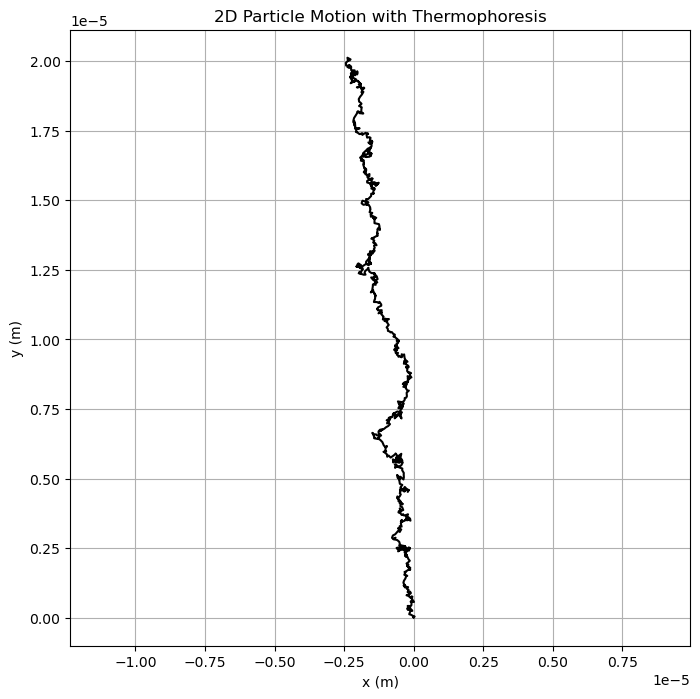

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
viscosity = 0.001  # Fluid viscosity in Pa.s (e.g. water at room temperature)
initial_temperature = 300  # Initial temperature in K (at y=0)
particle_radius = 1.6e-6  # Particle radius in meters
time_step = 0.01  # Time step for the simulation in seconds
num_simulations = 1000  # Number of simulations
time_period = 1.0  # Time period in seconds

# Define the thermophoretic drift function
def thermophoretic_drift(particle_position, temperature_gradient):
    x, y = particle_position
    # Calculate temperature at the particle's current position
    temperature = initial_temperature + y * temperature_gradient
    # Calculate thermal diffusion coefficient
    thermal_diff_coeff = 54e-12  # m^2 s^-1 K^-1: value from reference paper
    # Calculate elastic diffusion coefficient (based on provided formula)
    T_ni = 308  # Kelvin
    K_o = 1e-11
    alpha = 2
    c_e = 44
    elastic_diff_coeff = (2 * alpha * c_e * K_o * particle_radius / T_ni) * (1 - temperature / T_ni)**(2 * alpha - 1)
    driff_coeff = thermal_diff_coeff - elastic_diff_coeff
    # Calculate thermophoretic drift in x and y directions
    thermophoretic_velocity_y = (driff_coeff * temperature_gradient) / (6 * np.pi * viscosity * particle_radius)
    # Assuming no drift in x-axis, you can customize it according to the conditions in your system
    thermophoretic_velocity_x = 0
    
    return np.array([thermophoretic_velocity_x, thermophoretic_velocity_y])

# Function to simulate particle motion in 2D
def simulate_particle_motion_2d(temperature_gradient):
    # Calculate diffusion coefficients for x and y directions
    D = (1.380649e-23 * initial_temperature) / (6 * np.pi * viscosity * particle_radius)
    
    # Initialize particle position and trajectory arrays
    particle_position = np.array([0.0, 0.0], dtype=np.float64)
    trajectory_x = [particle_position[0]]
    trajectory_y = [particle_position[1]]
    
    # Simulate particle motion
    for _ in range(num_simulations):
        # Calculate thermophoretic drift
        drift = thermophoretic_drift(particle_position, temperature_gradient)
        
        # Generate random displacement for Brownian motion in x and y directions
        random_displacement_x = np.sqrt(2 * D * time_step) * np.random.randn()
        random_displacement_y = np.sqrt(2 * D * time_step) * np.random.randn()
        
        # Update particle position
        particle_position += drift * time_step + np.array([random_displacement_x, random_displacement_y], dtype=np.float64)
        
        # Store trajectory
        trajectory_x.append(particle_position[0])
        trajectory_y.append(particle_position[1])
    
    return np.array(trajectory_x), np.array(trajectory_y)

# Define temperature gradient
temperature_gradient = 1e-3  # Temperature gradient in K/m

# Simulate particle motion in 2D
trajectory_x, trajectory_y = simulate_particle_motion_2d(temperature_gradient)

# Calculate metrics for x and y axes
net_displacement_x = trajectory_x[-1] - trajectory_x[0]  # Net displacement in x-direction
net_displacement_y = trajectory_y[-1] - trajectory_y[0]  # Net displacement in y-direction

mean_displacement_x = np.mean(trajectory_x)  # Mean displacement in x-direction
mean_displacement_y = np.mean(trajectory_y)  # Mean displacement in y-direction

std_dev_x = np.std(trajectory_x)  # Standard deviation of displacement in x-direction
std_dev_y = np.std(trajectory_y)  # Standard deviation of displacement in y-direction

# Print the calculated metrics
print(f"Net Displacement in x-direction: {net_displacement_x:.8f} m")
print(f"Net Displacement in y-direction: {net_displacement_y:.8f} m")
print(f"Mean Displacement in x-direction: {mean_displacement_x:.8f} m")
print(f"Mean Displacement in y-direction: {mean_displacement_y:.8f} m")
print(f"Standard Deviation in x-direction: {std_dev_x:.8f} m")
print(f"Standard Deviation in y-direction: {std_dev_y:.8f} m")

# Plotting the particle's trajectory in 2D
plt.figure(figsize=(8, 8))
plt.plot(trajectory_x, trajectory_y, color='black')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('2D Particle Motion with Thermophoresis')
plt.grid(True)
plt.axis('equal')
plt.show()
